In [1]:
# Import all the required libaries

import numpy as np # for array like operations
import xarray as xr # for loading the netcdf files
import matplotlib.pyplot as plt # for plotting
import cartopy.crs as ccrs # for adding projections    
import cartopy.feature as cfeature # for adding features to the maps
import cartopy as cp 

In [2]:
file = '/media/posiden/posiden/ERA5_Data/NCEP/2d/air.2m.mon.mean.nc'
data = xr.open_dataset(file) ## open the data using xr.open_dataset()
data

<xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 529, nbnds: 2)
Coordinates:
  * level      (level) float32 2.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    air        (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [5]:
## extract the details of the files loaded using xarray , you can learn a lot about the details of the datafile, as in about the dimensions and attributes of the datafile

print(data.air.attrs)
print(data.air.dims)
print(data.air.coords)
print(data.air.data)
print(data.air.encoding)
print(data.air.values)
print(data.air.attrs['units'])  

{'long_name': 'Monthly Mean of Forecast of Air temperature at 2 m', 'units': 'degK', 'precision': 2, 'GRIB_id': 11, 'GRIB_name': 'TMP', 'var_desc': 'Air temperature', 'dataset': 'NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages', 'level_desc': '2 m', 'statistic': 'Mean', 'parent_stat': 'Individual Obs', 'standard_name': 'air_temperature', 'cell_methods': 'time: mean (interval: 6 hours to daily) time: mean (interval: 1 day to monthly)', 'valid_range': array([120., 430.], dtype=float32), 'actual_range': array([197.63, 313.76], dtype=float32)}
('time', 'level', 'lat', 'lon')
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
[[[[239.67    239.64    239.62    ... 239.77    239.74    239.7    ]
   [241.2     241.11    241.01    ... 241.44    241.37    241.29   

In [3]:
# let try to do a spatial plot of the data

# reduce the dimensions 
data_mean  = data.air.mean(dim='time').squeeze()
data_mean

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[257.53845, 257.6219 , 257.6049 , ..., 257.56805, 257.58505,
        257.5414 ],
       [257.75436, 257.8153 , 257.85886, ..., 257.6604 , 257.69244,
        257.73047],
       [257.92075, 258.04474, 258.1469 , ..., 257.66226, 257.73523,
        257.83163],
       ...,
       [233.16258, 232.61668, 232.08446, ..., 234.88156, 234.29582,
        233.72296],
       [232.20773, 231.84747, 231.49063, ..., 233.30655, 232.93875,
        232.57211],
       [230.4654 , 230.31566, 230.16544, ..., 230.91402, 230.76501,
        230.61537]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

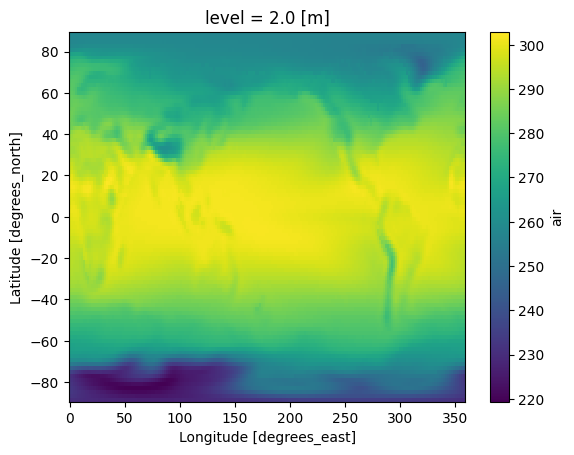

In [4]:
# lets do the plot 
data_mean.plot()

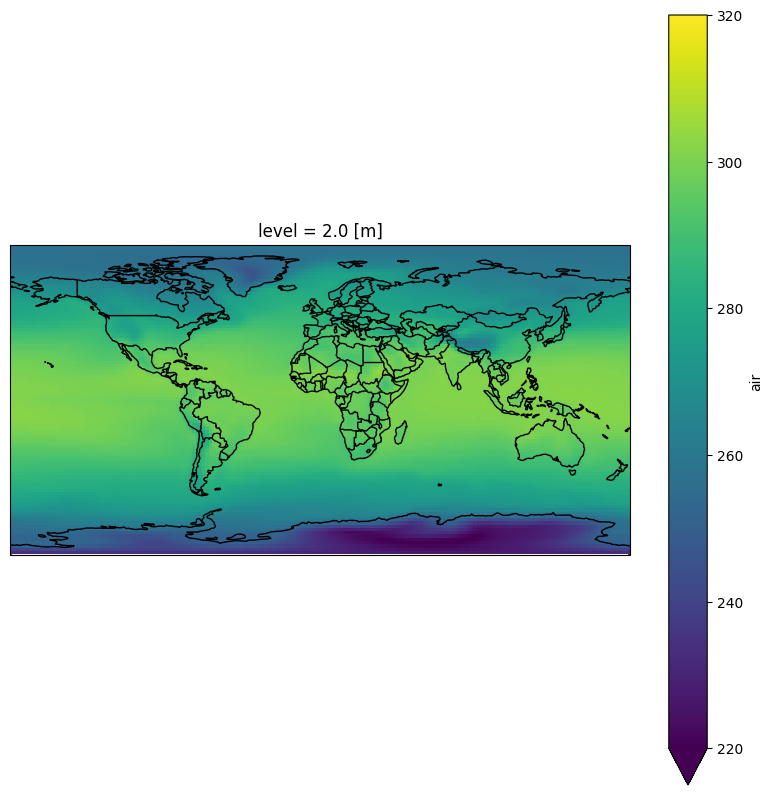

In [5]:
# time for pretty plot

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-90,90],crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

data_mean.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='viridis',vmin=220,vmax=320) # 220K - 32
plt.show()

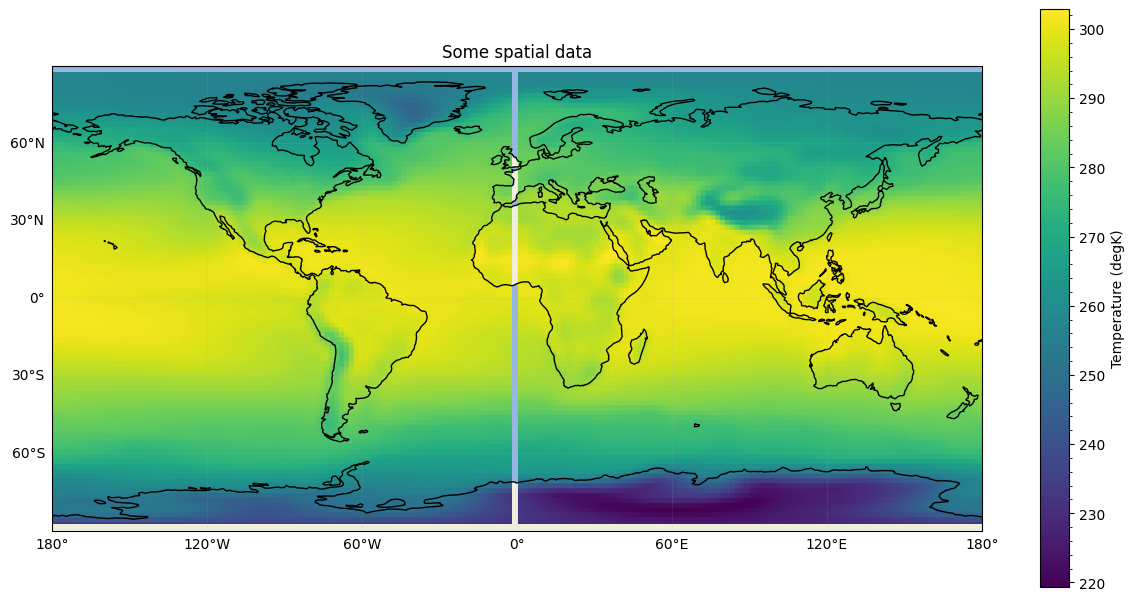

In [9]:
# now do a pretty plot

#read the lat and lons
lat = data.air.lat
lon = data.air.lon


fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
mp = ax.imshow(data_mean,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='viridis')

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='blue')
# ax.add_feature(states_provinces, edgecolor='blue')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp,shrink=0.5,label='Temperature (degK)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False
plt.title('Some spatial data')
plt.show()

In [10]:
## lets do a time series plot

data

<xarray.Dataset>
Dimensions:    (level: 1, lat: 94, lon: 192, time: 529, nbnds: 2)
Coordinates:
  * level      (level) float32 2.0
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    air        (time, level, lat, lon) float32 239.7 239.6 239.6 ... 242.9 242.8
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [11]:
data_timeseries = data.air.mean(dim=['lat','lon']).squeeze()
data_timeseries

<xarray.DataArray 'air' (time: 529)>
array([277.0287 , 275.63403, 276.5392 , 277.58054, 279.1124 , 280.36618,
       280.39017, 280.35925, 279.45862, 278.0246 , 277.68164, 277.64862,
       277.41086, 276.97433, 277.06686, 277.916  , 279.58472, 280.74164,
       281.5189 , 280.8851 , 279.50946, 278.346  , 277.51968, 277.36566,
       277.5461 , 276.94876, 277.14252, 277.81085, 279.35114, 280.8542 ,
       281.20428, 281.10767, 279.40952, 278.06882, 277.55484, 277.77008,
       276.8117 , 276.47137, 276.02393, 277.0474 , 278.89297, 280.31543,
       281.02658, 280.14914, 278.92923, 278.0976 , 277.5456 , 277.72455,
       277.18054, 276.5662 , 276.91486, 277.5761 , 279.37988, 280.4972 ,
       280.72653, 280.83722, 279.6328 , 277.87085, 277.4246 , 277.30972,
       277.24786, 276.415  , 276.44113, 277.34836, 279.65097, 280.3482 ,
       281.04517, 280.65115, 279.44885, 278.20844, 277.3929 , 277.30582,
       277.2453 , 275.89438, 276.2835 , 277.46457, 279.02817, 280.72217,
       280.83838, 280.56784, 279.15848, 277.91602, 277.45255, 277.38297,
       276.9149 , 276.94867, 276.4915 , 277.55655, 279.283  , 280.42218,
       281.10095, 280.59616, 279.09064, 278.1512 , 277.4669 , 277.2397 ,
       277.06354, 276.224  , 276.09625, 277.43863, 279.20413, 280.6819 ,
       281.39096, 280.37952, 279.27127, 278.01562, 277.22043, 277.3491 ,
       277.29016, 276.6989 , 276.80856, 277.93677, 279.72278, 281.15808,
       281.41315, 281.07687, 279.85693, 278.38873, 277.26157, 277.46252,
...
       281.63403, 281.68024, 280.9024 , 279.12125, 278.42896, 278.16763,
       277.7076 , 277.21408, 277.42368, 278.5519 , 280.37906, 281.34216,
       281.64728, 281.66388, 280.7213 , 279.26096, 278.1412 , 277.8637 ,
       277.50528, 277.28613, 277.4151 , 278.41748, 279.92703, 281.378  ,
       281.61188, 281.4737 , 280.27347, 279.59232, 278.6958 , 278.2733 ,
       278.30606, 277.996  , 277.86935, 278.8856 , 280.4649 , 281.48956,
       281.95578, 281.9572 , 280.8157 , 279.68817, 279.1799 , 278.48267,
       278.1404 , 277.7681 , 277.81076, 278.6327 , 280.2995 , 281.21408,
       281.836  , 281.53186, 280.41272, 279.5038 , 278.61777, 278.37036,
       277.9746 , 277.85297, 277.4507 , 278.76007, 280.40762, 281.6455 ,
       282.05814, 281.66962, 280.34723, 279.63516, 278.37097, 278.3797 ,
       277.6247 , 277.78546, 277.8117 , 278.89337, 280.36343, 281.51706,
       282.11212, 281.81686, 280.70703, 279.67508, 278.69986, 278.49814,
       277.9323 , 277.62537, 277.25027, 278.96368, 280.3991 , 281.61884,
       281.93698, 281.43933, 280.75772, 279.4158 , 279.1454 , 278.17792,
       277.66525, 277.10968, 277.23236, 278.3915 , 280.14822, 281.08517,
       281.99283, 281.5862 , 280.73126, 279.4797 , 278.57404, 278.4102 ,
       278.0049 , 277.71524, 277.73608, 278.36557, 280.18948, 281.7686 ,
       282.04828, 281.71713, 280.6614 , 279.71152, 278.20236, 278.34595,
       277.64514], dtype=float32)
Coordinates:
    level    float32 2.0
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01

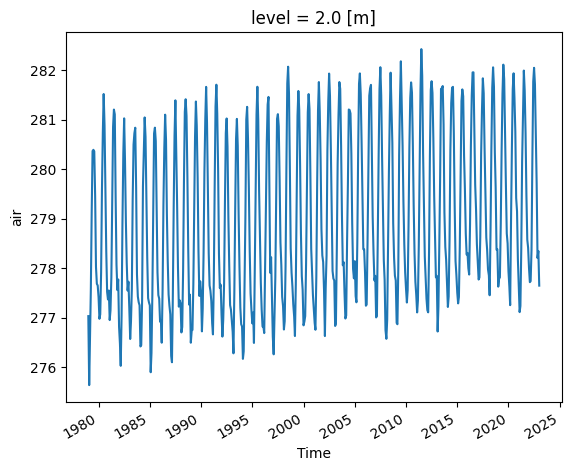

In [12]:
# plot 

data_timeseries.plot()

/home/posiden/anaconda3/envs/ees405_module/lib/python3.10/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


Slope: 0.0246 °K/year


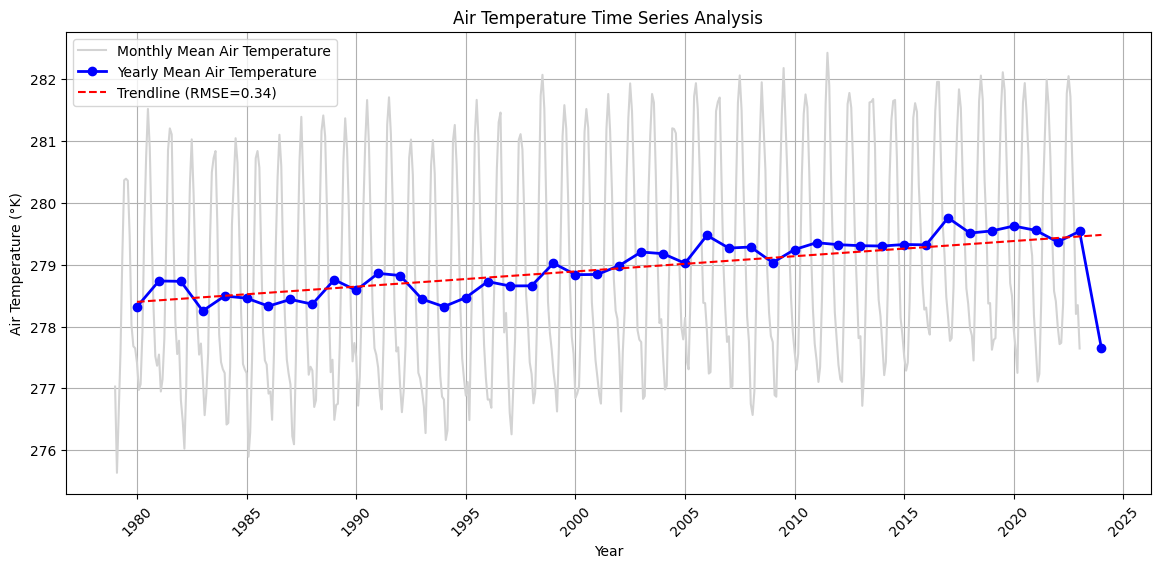

In [17]:
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Open the dataset
file = '/media/posiden/posiden/ERA5_Data/NCEP/2d/air.2m.mon.mean.nc'
data = xr.open_dataset(file)
data_timeseries = data.air.mean(dim=['lat', 'lon']).squeeze()

# Yearly resampling
data_yearly = data_timeseries.resample(time='Y').mean()

# Plotting
plt.figure(figsize=(14, 6))

# Plot monthly data
plt.plot(data_timeseries.time, data_timeseries, label='Monthly Mean Air Temperature', color='lightgray')

# Plot yearly data
plt.plot(data_yearly.time, data_yearly, label='Yearly Mean Air Temperature', color='blue', linewidth=2, marker='o')

# Convert datetime to numerical format for regression
X = data_yearly.time.dt.year.values.reshape(-1, 1)  # Extract year and reshape for sklearn
y = data_yearly.values.reshape(-1, 1)

# Linear regression
linreg = LinearRegression().fit(X, y)
y_pred = linreg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Plot the trendline
plt.plot(data_yearly.time, y_pred, label=f'Trendline (RMSE={rmse:.2f})', color='red', linestyle='--')

# Calculate and print the slope
slope = linreg.coef_[0][0]  # Slope of the linear regression
print(f"Slope: {slope:.4f} °K/year")  # Change in temperature per year

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Air Temperature (°K)')
plt.title('Air Temperature Time Series Analysis')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


In [18]:
data_3d = xr.open_dataset('/media/posiden/posiden/ERA5_Data/NCEP/3d/air.mon.ltm.nc')
data_3d


/home/posiden/anaconda3/envs/ees405_module/lib/python3.10/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/posiden/anaconda3/envs/ees405_module/lib/python3.10/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Created 2022/01/11 by doMonthLTMNC4
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

In [19]:
# reducing the dimensionality of the data
data_3d_mean = data_3d.air.mean(dim=['lat','lon','time']).squeeze()
data_3d_mean

<xarray.DataArray 'air' (level: 17)>
array([281.26266, 277.56396, 274.45526, 267.00372, 260.8889 , 252.58217,
       242.07874, 229.63977, 223.56425, 218.62984, 213.85156, 209.06587,
       209.71344, 212.36491, 216.39   , 220.05284, 227.04445],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

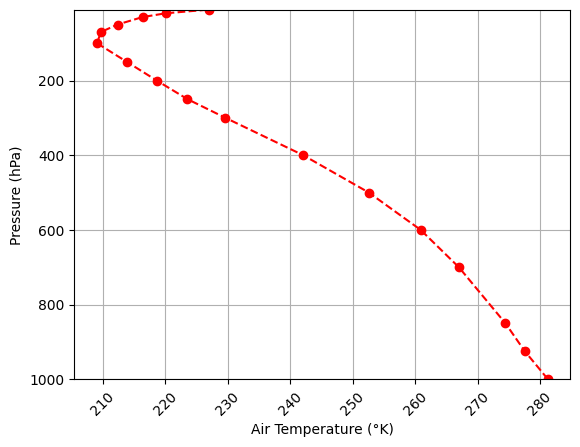

In [22]:
# plot the levels data 
plt.plot(data_3d_mean, data_3d_mean.level, marker='o', linestyle='--', color='red')
plt.ylim(max(data_3d_mean.level), min(data_3d_mean.level))
plt.xlabel('Air Temperature (°K)')
plt.ylabel('Pressure (hPa)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [23]:
print(data_3d)

<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 248.0 248.0 ... 251.6
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    ins

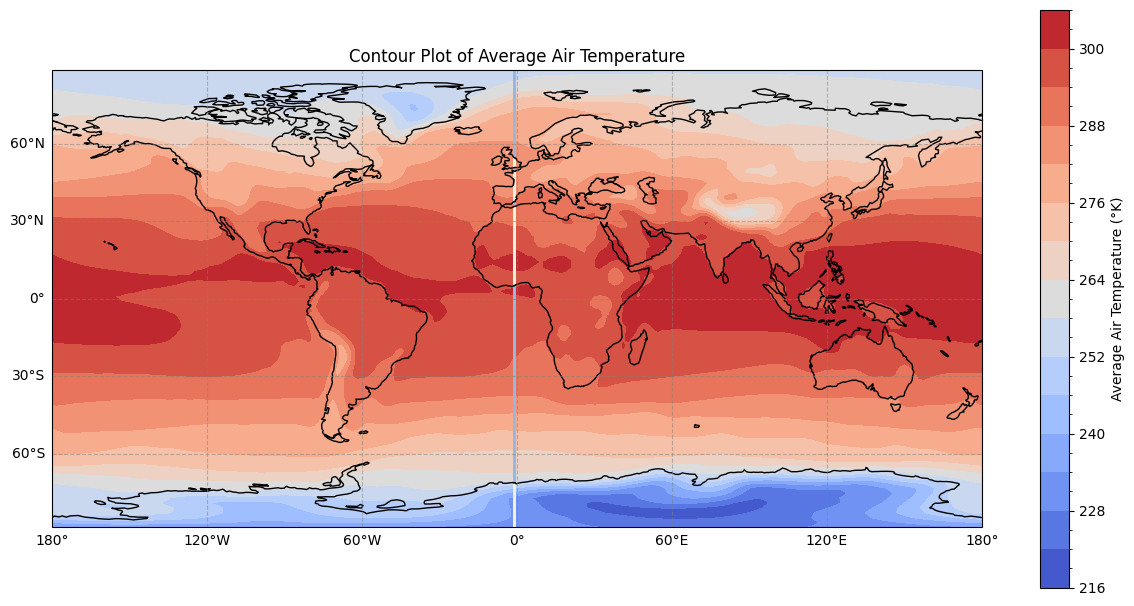

In [35]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
file = '/media/posiden/posiden/ERA5_Data/NCEP/2d/air.2m.mon.mean.nc'
data = xr.open_dataset(file)

# Average out the time and level dimensions
data_mean = data.air.mean(dim=['time', 'level'])

# Setup the plot with Cartopy
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Contour plot
# We don't need to meshgrid lat and lon for contourf in this context as xarray aligns these dimensions correctly
contour_plot = ax.contourf(data_mean.lon, data_mean.lat, data_mean, levels=15, cmap='coolwarm', transform=ccrs.PlateCarree())

# Adding map features for better visualization
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)

# Adding state and province borders for more detail
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
# ax.add_feature(states_provinces, edgecolor='gray')

# Colorbar
cbar = fig.colorbar(contour_plot, shrink=0.5, label='Average Air Temperature (°K)')
cbar.minorticks_on()

# Adding gridlines and labels
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Contour Plot of Average Air Temperature')
plt.show()


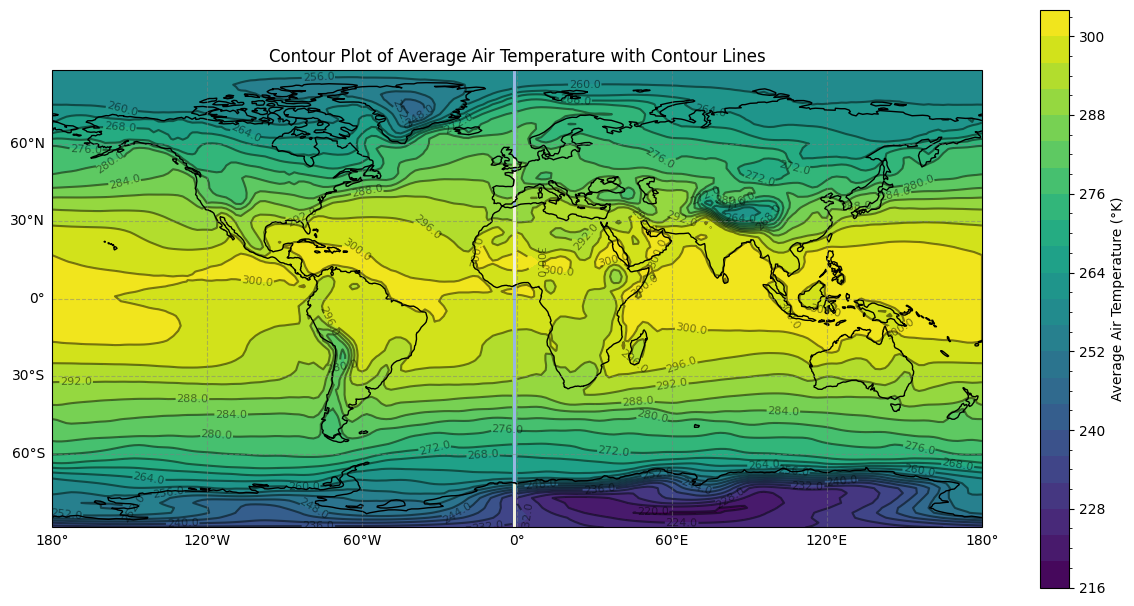

In [39]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
file = '/media/posiden/posiden/ERA5_Data/NCEP/2d/air.2m.mon.mean.nc'
data = xr.open_dataset(file)

# Average out the time and level dimensions
data_mean = data.air.mean(dim=['time', 'level'])

# Setup the plot with Cartopy
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Filled contour plot
contourf_plot = ax.contourf(data_mean.lon, data_mean.lat, data_mean, levels=20, cmap='viridis', transform=ccrs.PlateCarree())

# Contour lines plot
contour_lines = ax.contour(data_mean.lon, data_mean.lat, data_mean, levels=20, colors='black', transform=ccrs.PlateCarree(), alpha=0.5)
# Adding labels to contour lines
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')

# Adding map features for better visualization
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)

# Adding state and province borders for more detail
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
# ax.add_feature(states_provinces, edgecolor='gray')

# Colorbar
cbar = fig.colorbar(contourf_plot, shrink=0.5, label='Average Air Temperature (°K)')
cbar.minorticks_on()

# Adding gridlines and labels
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Contour Plot of Average Air Temperature with Contour Lines')
plt.show()


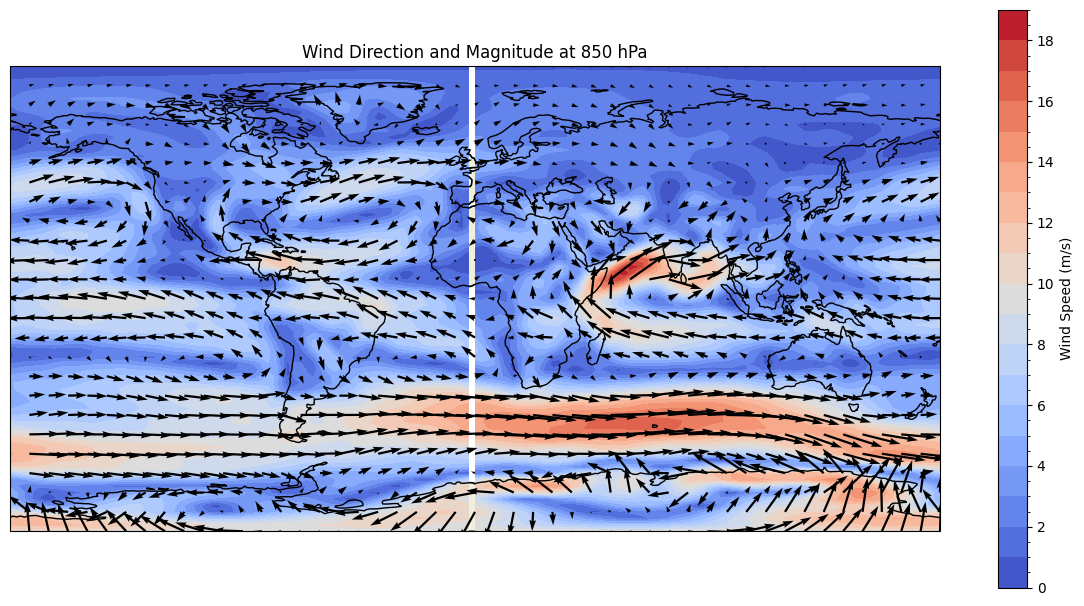

In [70]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the wind datasets
uwnd = xr.open_dataset('/media/posiden/posiden/ERA5_Data/NCEP/3d/uwnd.mon.mean.jja.nc')
vwnd = xr.open_dataset('/media/posiden/posiden/ERA5_Data/NCEP/3d/vwnd.mon.mean.jja.nc')

# Compute the mean over time
uwnd_mean = uwnd.uwnd.mean(dim='time')
vwnd_mean = vwnd.vwnd.mean(dim='time')

# Select the data at 850 hPa
uwnd_850 = uwnd_mean.sel(level=850)
vwnd_850 = vwnd_mean.sel(level=850)


# Compute wind speed for background
wind_speed = np.sqrt(uwnd_850**2 + vwnd_850**2)

# Setup the plot with Cartopy
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot wind speed as background
speed_plot = ax.contourf(uwnd_850.lon, uwnd_850.lat, wind_speed, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
cbar = fig.colorbar(speed_plot, shrink=0.5, label='Wind Speed (m/s)')
cbar.minorticks_on()

# Quiver plot for wind direction and magnitude
# Note: Quiver plots can be dense; thinning data can help visualization
lon = uwnd_850.lon.values
lat = uwnd_850.lat.values
u = uwnd_850.values
v = vwnd_850.values

# Thinning data for clearer quiver plot
thin = 3  # Change thinning factor as needed for your dataset's resolution
q = ax.quiver(lon[::thin], lat[::thin], u[::thin, ::thin], v[::thin, ::thin], transform=ccrs.PlateCarree(), scale=300)

# Adding map features for better visualization
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)

plt.title('Wind Direction and Magnitude at 850 hPa')
plt.show()


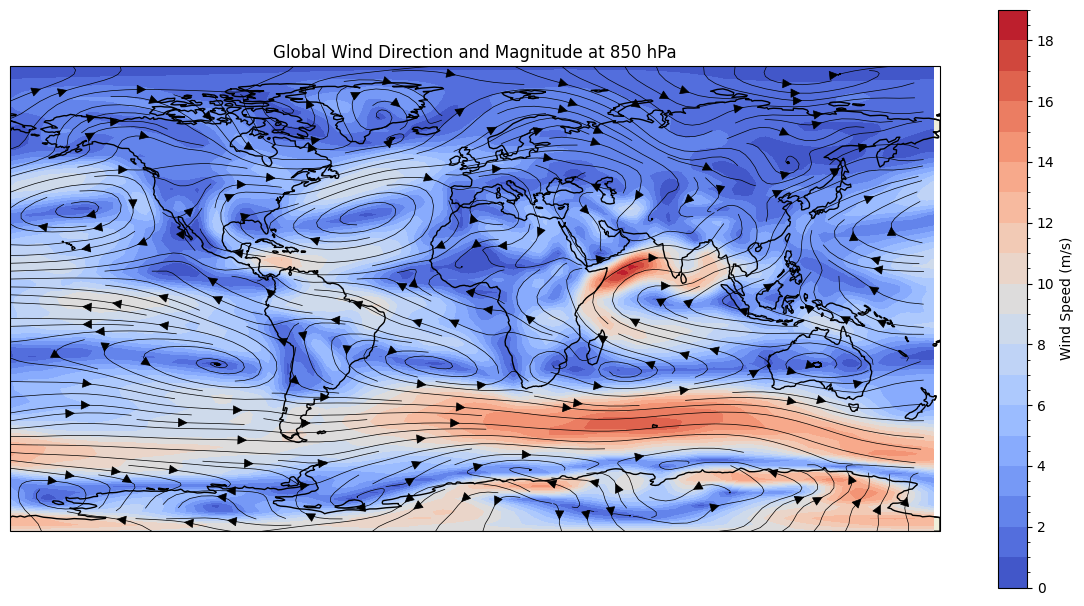

In [71]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


uwnd_850['lon'] = ((uwnd_850['lon'] + 180) % 360) - 180
vwnd_850['lon'] = ((vwnd_850['lon'] + 180) % 360) - 180
uwnd_850 = uwnd_850.sortby('lon')  # Ensure data is sorted after adjustment
vwnd_850 = vwnd_850.sortby('lon')

# Compute wind speed
wind_speed = np.sqrt(uwnd_850**2 + vwnd_850**2)

# Setup the plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()  # Ensure full global coverage

# Plot wind speed background
speed_plot = ax.contourf(uwnd_850.lon, uwnd_850.lat, wind_speed, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
cbar = fig.colorbar(speed_plot, shrink=0.5, label='Wind Speed (m/s)')
cbar.minorticks_on()

# Streamplot for direction and magnitude
stream = ax.streamplot(uwnd_850.lon, uwnd_850.lat, uwnd_850.values, vwnd_850.values, density=2, color='black', linewidth=0.5, arrowsize=1.5, transform=ccrs.PlateCarree())

# Map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)

plt.title('Global Wind Direction and Magnitude at 850 hPa')
plt.show()


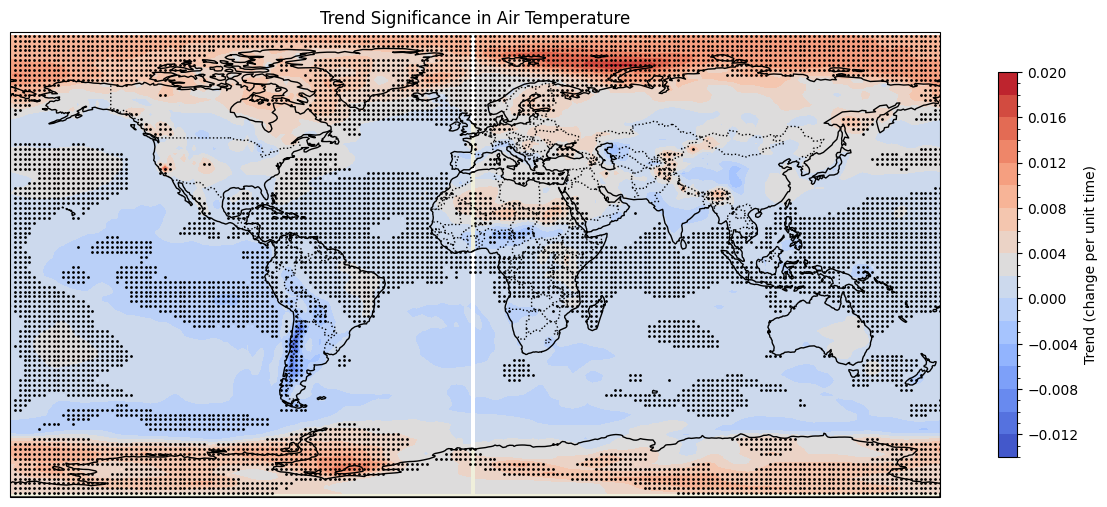

In [63]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
file = '/media/posiden/posiden/ERA5_Data/NCEP/2d/air.2m.mon.mean.nc'
data = xr.open_dataset(file)

# For simplicity, we'll work with the air temperature data and squeeze the level dimension if it exists
data_squeezed = data.air.squeeze()

# Assuming time is in a recognizable datetime format; otherwise, convert to numeric
time_numeric = np.arange(len(data_squeezed.time))

# Initialize arrays to hold slope and p-value information
slope = xr.full_like(data_squeezed.isel(time=0), fill_value=0)
p_value = xr.full_like(data_squeezed.isel(time=0), fill_value=1)

# Loop through each pixel to perform linear regression
for lat_idx in range(len(data_squeezed.lat)):
    for lon_idx in range(len(data_squeezed.lon)):
        y = data_squeezed.isel(lat=lat_idx, lon=lon_idx)
        regression_result = stats.linregress(time_numeric, y)
        slope[lat_idx, lon_idx] = regression_result.slope
        p_value[lat_idx, lon_idx] = regression_result.pvalue

# Determine significance based on a threshold (e.g., p < 0.05)
significant = p_value < 0.05

# Plotting
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()

# Plot the trend (slope) as background
trend_plot = ax.contourf(data_squeezed.lon, data_squeezed.lat, slope, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
cbar = fig.colorbar(trend_plot, shrink=0.5, label='Trend (change per unit time)')
cbar.minorticks_on()

# Highlight significant trends
lon, lat = np.meshgrid(data_squeezed.lon, data_squeezed.lat)
ax.scatter(lon[significant], lat[significant], color='black', s=1, transform=ccrs.PlateCarree())

# Adding map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.title('Trend Significance in Air Temperature')
plt.show()


/tmp/ipykernel_6973/986942940.py:16: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  results = xr.apply_ufunc(


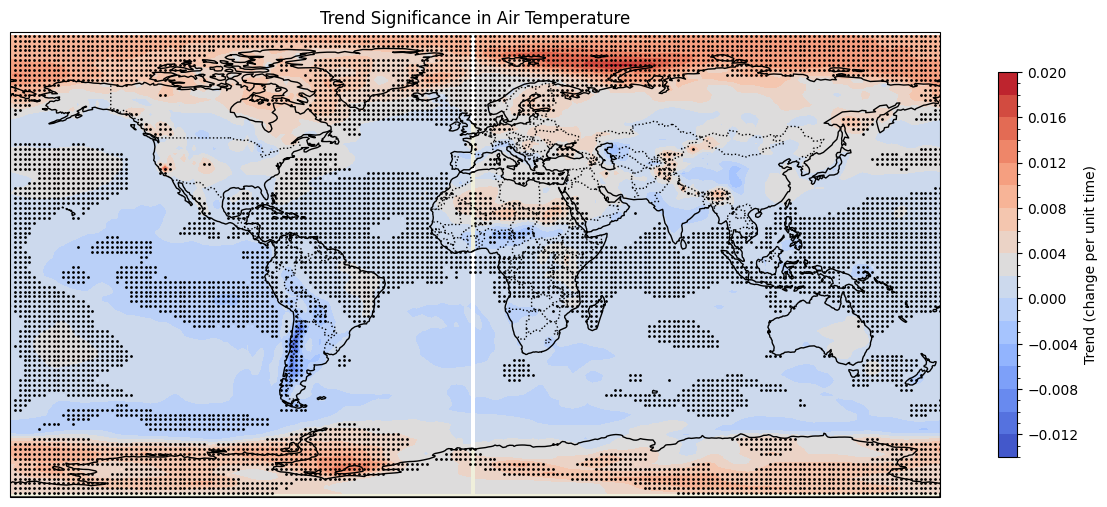

In [62]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def linregress_func(y, x):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return np.array([slope, p_value])

def apply_linregress(data_array):
    time_index = np.arange(len(data_array.time))
    data_array_chunked = data_array.chunk({"time": -1})

    results = xr.apply_ufunc(
        linregress_func,
        data_array_chunked,
        input_core_dims=[["time"]],
        output_core_dims=[["output_dim"]],
        vectorize=True,
        dask="parallelized",
        output_dtypes=[float],
        output_sizes={"output_dim": 2},
        kwargs={"x": time_index}
    )

    slope = results.isel(output_dim=0)
    p_value = results.isel(output_dim=1)
    
    return slope, p_value

# Load dataset
file = '/media/posiden/posiden/ERA5_Data/NCEP/2d/air.2m.mon.mean.nc'
data = xr.open_dataset(file, chunks={'time': -1})  # Ensure dataset is chunked for Dask

# Squeeze the level dimension and select the air temperature variable
data_squeezed = data.air.squeeze()

# Apply linear regression to compute slope and p-value
slope, p_value = apply_linregress(data_squeezed)

# Compute significance
significant = p_value < 0.05

# Plotting
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()

# Plot trend (slope) as background
slope_plot = ax.contourf(data_squeezed.lon, data_squeezed.lat, slope, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())
cbar = fig.colorbar(slope_plot, shrink=0.5, label='Trend (change per unit time)')
cbar.minorticks_on()

# Highlight significant trends
lon, lat = np.meshgrid(data_squeezed.lon, data_squeezed.lat)
ax.scatter(lon[significant], lat[significant], color='black', s=1, transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.title('Trend Significance in Air Temperature')
plt.show()
